## Commence training

In [1]:
import sys
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# import importlib
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Reloading custom file to incorporate changes dynamically
# importlib.reload(my_classes)

t0 = time.time()
path = '/pf/b/b309170'
path_data = path + '/my_work/icon-ml_data/cloud_cover_parameterization/grid_column_based/based_on_var_interpolated_data'
path_model = path + '/workspace_icon-ml/cloud_cover_parameterization/grid_column_based/saved_models'
# Add path with my_classes to sys.path
sys.path.insert(0, path + '/workspace_icon-ml/cloud_cover_parameterization/')

from my_classes import TimeOut

NUM = 1
timeout = 2130 #Stop after how many minutes
filename = "model_grid_column_based_final_%d"%NUM

# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(gpus[3], 'GPU')

In [2]:
input_train = np.load(path_data + '/cloud_cover_input_train_%d.npy'%NUM, mmap_mode='r')
input_valid = np.load(path_data + '/cloud_cover_input_valid_%d.npy'%NUM)
input_test = np.load(path_data + '/cloud_cover_input_test_%d.npy'%NUM)
output_train = np.load(path_data + '/cloud_cover_output_train_%d.npy'%NUM)
output_valid = np.load(path_data + '/cloud_cover_output_valid_%d.npy'%NUM)
output_test = np.load(path_data + '/cloud_cover_output_test_%d.npy'%NUM)

In [3]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 186))
model.add(Dense(256, activation='relu'))
model.add(Dense(27, activation='linear'))

In [6]:
model.compile(loss='mse', optimizer=Nadam())
time_callback = TimeOut(t0, timeout)
history = model.fit(input_train, output_train, batch_size=32, epochs=70, verbose=2,
                    validation_data=(input_valid, output_valid), callbacks=[time_callback])

Train on 1331414 samples, validate on 147934 samples
Starting training
Epoch 1/70
1331414/1331414 - 303s - loss: 6.9345 - val_loss: 4.5714
Epoch 2/70
1331414/1331414 - 271s - loss: 5.9064 - val_loss: 3.5992
Epoch 3/70
1331414/1331414 - 264s - loss: 4.1252 - val_loss: 3.4587
Epoch 4/70
1331414/1331414 - 273s - loss: 3.6383 - val_loss: 3.1536
Epoch 5/70
1331414/1331414 - 268s - loss: 4.6047 - val_loss: 3.1039
Epoch 6/70
1331414/1331414 - 271s - loss: 3.2116 - val_loss: 2.9702
Epoch 7/70
1331414/1331414 - 270s - loss: 2.9507 - val_loss: 2.7740
Epoch 8/70
1331414/1331414 - 278s - loss: 2.8371 - val_loss: 2.9317
Epoch 9/70
1331414/1331414 - 269s - loss: 2.7636 - val_loss: 2.7384
Epoch 10/70
1331414/1331414 - 222s - loss: 2.7052 - val_loss: 3.1913
Epoch 11/70
1331414/1331414 - 237s - loss: 2.6639 - val_loss: 2.6563
Epoch 12/70
1331414/1331414 - 243s - loss: 2.6105 - val_loss: 2.7276
Epoch 13/70
1331414/1331414 - 223s - loss: 2.9393 - val_loss: 3.3920
Epoch 14/70
1331414/1331414 - 240s - loss

In [7]:
#Serialize model to YAML
model_yaml = model.to_yaml()
with open(filename+".yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

#Serialize model and weights to a single HDF5-file
model.save(filename+'.h5')
print('Saved model to disk')

Saved model to disk


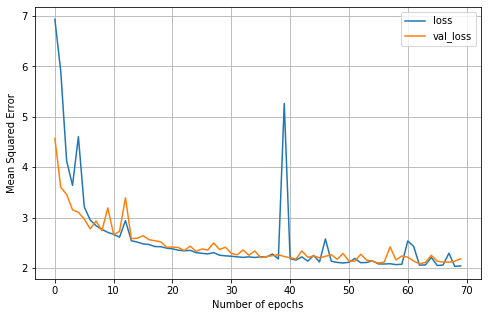

In [8]:
#Plotting the training progress
if len(history.history['loss']) > len(history.history['val_loss']):
    del history.history['loss'][-1]
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of epochs')
plt.savefig(filename+'.pdf')
plt.show()

In [9]:
train_loss = model.evaluate(input_train, output_train, verbose=2, batch_size=2000)
valid_loss = model.evaluate(input_valid, output_valid, verbose=2, batch_size=1000)
test_loss = model.evaluate(input_test, output_test, verbose=2, batch_size=1000)
with open(os.path.join(path_model, 'model_grid_column_based_final_%d.txt'%NUM), 'a') as file:
        file.write('\nTraining loss: %.4f\n'%(train_loss))
        file.write('Validation loss: %.4f\n'%(valid_loss))
        file.write('Test loss: %.4f\n'%(test_loss))
        file.write('Training epochs: %d'%(len(history.history['val_loss'])))

369837/369837 [==============================] - 1s 3us/sample - loss: 2.1239


A batch size vs speed comparison

In [5]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=32, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
37671/37671 - 163s - loss: 5.7958 - val_loss: 4.1048
Epoch 2/70
37671/37671 - 158s - loss: 3.5106 - val_loss: 3.3445
Epoch 3/70
37671/37671 - 160s - loss: 3.0881 - val_loss: 3.0603
Epoch 4/70
37671/37671 - 159s - loss: 2.8289 - val_loss: 3.0934
Epoch 5/70


KeyboardInterrupt: 

In [6]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=64, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
18836/18836 - 81s - loss: 2.3380 - val_loss: 2.3643
Epoch 2/70
18836/18836 - 80s - loss: 2.2472 - val_loss: 2.2779
Epoch 3/70
18836/18836 - 80s - loss: 2.1770 - val_loss: 2.1940
Epoch 4/70


KeyboardInterrupt: 

In [7]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=128, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
9418/9418 - 40s - loss: 1.9253 - val_loss: 2.0052
Epoch 2/70
9418/9418 - 39s - loss: 1.8769 - val_loss: 1.9473
Epoch 3/70


KeyboardInterrupt: 

In [8]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=256, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
4709/4709 - 21s - loss: 1.7481 - val_loss: 1.8657
Epoch 2/70


KeyboardInterrupt: 

In [9]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=512, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
2355/2355 - 11s - loss: 1.6420 - val_loss: 1.7843
Epoch 2/70
2355/2355 - 11s - loss: 1.6071 - val_loss: 1.7494
Epoch 3/70
2355/2355 - 11s - loss: 1.5921 - val_loss: 1.7403
Epoch 4/70
2355/2355 - 11s - loss: 1.5728 - val_loss: 1.7358
Epoch 5/70


KeyboardInterrupt: 

In [10]:
# model.compile(loss='mse', optimizer=Nadam())
# time_callback = TimeOut(t0, timeout)
# history = model.fit(input_train, output_train, batch_size=1024, epochs=70, verbose=2,
#                     validation_data=(input_valid, output_valid), callbacks=[time_callback])

Starting training
Epoch 1/70
1178/1178 - 6s - loss: 1.5325 - val_loss: 1.7771
Epoch 2/70
1178/1178 - 6s - loss: 1.5097 - val_loss: 1.7455
Epoch 3/70
1178/1178 - 6s - loss: 1.4973 - val_loss: 1.6940
Epoch 4/70
1178/1178 - 6s - loss: 1.4842 - val_loss: 1.7496
Epoch 5/70
1178/1178 - 6s - loss: 1.4759 - val_loss: 1.7449
Epoch 6/70
1178/1178 - 6s - loss: 1.4670 - val_loss: 1.6330
Epoch 7/70
1178/1178 - 6s - loss: 1.4556 - val_loss: 1.6501
Epoch 8/70
1178/1178 - 6s - loss: 1.4493 - val_loss: 1.6513
Epoch 9/70
1178/1178 - 6s - loss: 1.4461 - val_loss: 1.6367
Epoch 10/70


KeyboardInterrupt: 